In [4]:
import struct
from matplotlib import pyplot as plt
import numpy as np

In [5]:
%matplotlib inline 

In [70]:
header_info = [
    "XY Pixel Size",
    "Layer thickness",
    "Normal Exposure(s)",
    "Off Time(s)",
    "Bottom Exposure(s)",
    "Bottom Layers",
    "Z Lift Distance(mm)",
    "Z Lift Speed(mm/s)",
    "Z Retract Speed(mm/s)",
    "Total volume(ml)",
]

layers_header_info = [
    "Total number of layers",
    # doesn't depend on pixel size
    # does depend on screen resolution
    "????(depends on layer thikness or count)",
    "????",
    "????",
    "Screen Width Resolution",
    "Screen Length Resolution",
    "??",
    "??",
    "??",
    "??"    
]

In [71]:
def print_header(header_desc, data):
    for k, v in enumerate(header_desc):
        print("{}: {}".format(v, data[k]))


Structure size: 92 (5C)
XY Pixel Size: 0.04725
Layer thickness: 0.1
Normal Exposure(s): 8.0
Off Time(s): 1.0
Bottom Exposure(s): 60.0
Bottom Layers: 3
Z Lift Distance(mm): 4.0
Z Lift Speed(mm/s): 3.0
Z Retract Speed(mm/s): 3.0
Total volume(ml): 0.13846330299375
Total number of layer: 173
????: 14916
????: 0
????: 0
Screen Width Resolution: 1440
Screen Length Resolution: 2560
??: 3
??: 51992
??: 40965
??: 20480


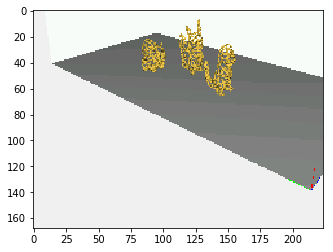

In [100]:
format_string = ">5di4diiii"
with open("test010_default.photons", "rb") as binary_file:
    # 6 + 8 + 8 + 8 == 30
    binary_file.seek(6)
    data = binary_file.read(struct.calcsize(format_string))
    print("Structure size: {} ({:02X})".format(struct.calcsize(format_string), struct.calcsize(format_string)))
    tuple_of_data = struct.unpack(format_string, data)
    print_header(header_info, tuple_of_data)
    w, h = tuple_of_data[10], tuple_of_data[12]
    np_image = np.zeros((h, w, 3), dtype=np.uint8)
    for i in range(tuple_of_data[12]):
        img_format = "<{}h".format(tuple_of_data[10])
        data = binary_file.read(struct.calcsize(img_format))
        img_line = struct.unpack(img_format, data)
        for k, j in enumerate(img_line):
            np_image[i][k][0] = ((j >> 11) & 0x1F) << 3
            np_image[i][k][1] = ((j >> 5)  & 0x3F) << 2
            np_image[i][k][2] = ((j >> 0)  & 0x1F) << 3
    plt.imshow(np_image, interpolation='nearest')
#     print(binary_file.tell())
    layers_header_format = '>IIIIIIHHHH'
    data = binary_file.read(struct.calcsize(layers_header_format))
    tuple_of_data = struct.unpack(layers_header_format, data)
    print_header(layers_header_info, tuple_of_data)
